In [1]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000 # Iteration count
train_size = x_train.shape[0]
batch_size = 100  # Minibatch size
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# Iterations per epoch
iter_per_epoch = max(train_size / batch_size, 1)

In [3]:
for i in range(iters_num):
    # Get a minibatch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # Calculate the gradient
    grad = network.gradient(x_batch, t_batch)
    
    # Update the parameters
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))

train acc, test acc | 0.101016666667, 0.1022
train acc, test acc | 0.78695, 0.79
train acc, test acc | 0.874583333333, 0.8788
train acc, test acc | 0.89615, 0.8989
train acc, test acc | 0.906916666667, 0.9083
train acc, test acc | 0.913233333333, 0.916
train acc, test acc | 0.9181, 0.9199
train acc, test acc | 0.9224, 0.9246
train acc, test acc | 0.926566666667, 0.9272
train acc, test acc | 0.929066666667, 0.9308
train acc, test acc | 0.932116666667, 0.9328
train acc, test acc | 0.934883333333, 0.936
train acc, test acc | 0.93785, 0.9372
train acc, test acc | 0.9397, 0.9398
train acc, test acc | 0.941883333333, 0.941
train acc, test acc | 0.944333333333, 0.9439
train acc, test acc | 0.9453, 0.9442


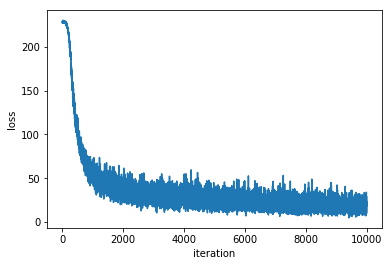

In [4]:
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='loss')

plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

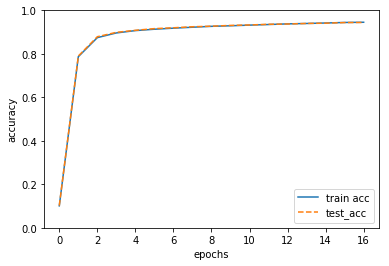

In [5]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test_acc', linestyle='--')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()